In [137]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [138]:
import pandas
data = pandas.read_csv("data/titanic.csv")
#check if data loaded by grabbing first 5
data[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Modeling and Prediction

The role of machine learning is to discover patterns and relationship in data and to put those use. The end goal is pretty simple though the methods may range from simple to extremely complicated, the goal however is to take the known and predict what we don't know. 

### Finding relationships between input and target (label) data

Trying to predict MPG for vehicles. The dataset could have model year, vehicle weight, horsepower, number of cylinders so on and the vehicles MPG rating. 

Input features are typically referred to using the symbol X, with subscripts differenting inputs when multiple input features exist. For example X_1 refers to manufactuer region, X_2 to model year and so on. 

Target variable is typically referred as Y. So a simple formula could be

Y = f(X) + Error

f: is the unknown function that relates the input variables to the target, Y. It is commonly referred to as the signal. 

E:(error) is called noise.

##### "The challenge of machine learning is to use data to determine what the true signal is, while ignoring noise"

If you knew f() in the auto mobile challenge then you'd be able to know the MPG rating of any car. But you could have numerous sources of noise, E, including:

1. imperfect measurement of each vehicle's MPG rating cased by small inaccuracies in the measuring devices --measurement noise
2. Variations in manufacturing process, causing each care in the fleet to have slightly different MPG measurements --- manufacturing process noise
3. Noise in the measurement of the input features, such as weight and horsepower
4. Lack of access to the braoder set of features that would exactly determine MPG

Assuming a good estimate of f. Machine learning has 2 goals predictions and inference. 

#### Prediction

Giving a healthymodel you can generate predictions of the target (Y) given new information (X_new). Giving you new data as needed. 

Examples of ML prediction cases:
deciphering handwritten digits or voice recordings
predicting stock market
forecasting
predicting which users are most likely to click, convert or buy
predicting which users will need product support and which are liekly to unsubscribe
determining which transactions are fraudulent
making recommendations

#### Inference

machine learning models and better understand the relationships between theinput features and the output target. Such as:

which input features are most strongly related to the target variable?
Are those relationships positive or negative?
Is f a simple relationship, or is it a function that's more nuanced and nonlinear?

## Models

#### Parametric vs nonparametric
assume that f takes a specific functional form, whereas nonparametric models don't make such strict assumptions. Parametric approaches tend to be simple and interpretable, but less accurate. 

Nonparametric approaches are usually les interpretable but more accurate across a broad range of problems. 

### Parametric Methods

linear regression is a parametric models. It assumes f is a linear combination of the numerical values of the inputs. 

f(X) = B_0 + X_1 x B_1 + X_2 x B_2

other commonly used parametric models include:

logistic regression
polynomial regression
linear discriminant analysis
quadratic discriminant analysis
(parametric) mixture models
naive bayes

#### drawbacks

the biggest drawback is the strong assumption about the true form of the function

### Nonparametric methods

f doesn't take a simple fixed function. The form and complexity of f adapts to complexity of the data. For example a classification tree.

Other examples:
k-nearest neighbors
splines
basis expansion methods
kernal smoothing
generalized additive models
neural nets
bagging
boosting
random forests
support vector machines


### supervised vs unsupervised

supervised problems is where you have access to the target variable for set of training data. Unsupervised are ones in which there's no identified target variable.

unsupervised have 2 main classes:

#### clustering

use the inpute features to discover natural groupings (k-means so on)

#### dimensionality reduction
transform the input features into a small number of coordinates that caputre most of the variability of the data (principle component analysis (PCA), multidimensional scaling, manifold learning

### Classifications

this is about putting things into buckets so to speak



In [139]:
#example code
from sklearn.linear_model import LogisticRegression as Model
import  numpy as np

In [140]:
#make 80/20 train test split
data_train = data[:int(0.8*len(data))]
data_test = data[int(0.8*len(data)):]

In [141]:
def cat_to_num(data):
    categories = unique(data)
    features = {}
    for cat in categories:
        binary = (data == cat)
        features["%s=%s" % (data.name, cat)] = binary.astype("int")
    return pandas.DataFrame(features)
    

In [142]:
def prepare_data(data):
    """Takes a dataframe of raw data and returns ML model features
    """
    
    # Initially, we build a model only on the available numerical values
    features = data.drop(["PassengerId", "Survived", "Fare", "Name", "Sex", "Ticket", "Cabin", "Embarked"], axis=1)
    
    # Setting missing age values to -1
    features["Age"] = data["Age"].fillna(-1)
    
    # Adding the sqrt of the fare feature
    features["sqrt_Fare"] = sqrt(data["Fare"])
    
    # Adding gender categorical value
    features = features.join( cat_to_num(data['Sex']) )
    

    # Adding Embarked categorical value
    
    #features = features.join( cat_to_num(data['Embarked']) )
    
    return features

## Building logistical regression classifier via scikit-learn

In [143]:
#get the features
features = prepare_data(data_train)
#see if it worked with the first 5 entries
features[:5]

,Pclass,Age,SibSp,Parch,sqrt_Fare,Sex=female,Sex=male
0,3,22.0,1,0,2.692582,0,1
1,1,38.0,1,0,8.442944,1,0
2,3,26.0,0,0,2.815138,1,0
3,1,35.0,1,0,7.286975,1,0
4,3,35.0,0,0,2.837252,0,1


In [144]:
def train(features, target):
    print(features)
    print(target)
    model = Model()
    model.fit(features, target)
    return model


In [145]:
def predict(model, new_features):
    preds = model.predict(new_features)
    return preds

In [146]:
model = Model()
model.fit(features, data_train["Survived"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [147]:
model.predict(prepare_data(data_test))

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [148]:
#what is the accuracy
model.score(prepare_data(data_test), data_test["Survived"])

0.82122905027932958

### Logistic Regression

Is the simplest ML algo for classification problems. To understand think of a problem as only having to features and a dataset divided into 2 classes. Such as the titanic features of Age and sqft(Fare). The target(label) data of survived or died. 

The Algo consists of the following steps:
1. You can start the search by picking the parameter values at random, hence lacing a random line in an x,y chart for visualization
2. Measure how well this line separates the 2 classes. In logistic regression, you use the statistical deviances for the 'goodness-of-fit' measurement. 
3. Guess new values of the parameters and measure the separation power.
4. Repeat until there are no better guesses. This is an optimization procedure that can be done with a range of optimization algorithms. Gradient descent is a popular choice for a simple optimization algo.

This approach can be extended to more dimensions, so you're not limited to 2 features. 

Some aspects of logistic regression:

1. The algo is simple to understand both from a human and computationally speaking
2. The performance will degrade if the decision boundary that separates teh classes needs to be highly nonlinear
3. Logistic regression algorithms can sometimes overfit the data, and you often need to use a technique called regularization that limits this danger



## Building SVM (support vector machines) nonlinear



In [149]:
from sklearn.svm import SVC
model = SVC()
model.fit(features, data_train["Survived"])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [150]:
model.score(prepare_data(data_test), data_test["Survived"])

0.86033519553072624

### Support Vector Machines

It has a similiar concept as logistic regression. Find the line (or equivalent in higher dimensions) that separates the classes optimally. Instead of measuring the distance to all points, SVMs try to find the largetst margin between only the points on either side of the decision line. The idea is that there's no reason to worry about points that are well within the boundary, only ones that are close.

## Multiple classes

Handwritten digit recognition is the 'hello world' for multiple class machine learning problems. MNIST database of handwritten digits is the most popularly known db for this. The images are 28 x 28 pixels. 

To solve this problem you square the pixel dimensions to make 784. Each pixel is then a feature. 

Then find a non-linear algo that supports multiclass problems. k-nearest neighbor is such one. 

In [151]:
mnist = pandas.read_csv("data/mnist_small.csv")
mnist_train = mnist[:int(0.8*len(mnist))]
mnist_test = mnist[int(0.8*len(mnist)):]

In [152]:
preds[:5]

array([[ 0. ,  0. ,  0. ,  0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.3,  0. ,  0. ,  0. ,  0. ,  0. ,  0.6,  0. ,  0.1,  0. ],
       [ 0. ,  0. ,  0. ,  0.1,  0. ,  0. ,  0. ,  0.5,  0. ,  0.4],
       [ 0. ,  0. ,  0. ,  0. ,  0.7,  0. ,  0. ,  0. ,  0. ,  0.3]])

In [153]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(mnist_train.drop("label", axis=1), mnist_train['label'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [154]:
preds = knn.predict_proba(mnist_test.drop('label', axis=1))
pandas.DataFrame(preds[:5], index=["Digit %d"%(i+1) for i in range(5)])

,0,1,2,3,4,5,6,7,8,9
Digit 1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Digit 2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Digit 3,0.3,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.1,0.0
Digit 4,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.5,0.0,0.4
Digit 5,0.0,0.0,0.0,0.0,0.7,0.0,0.0,0.0,0.0,0.3


In [155]:
knn.score(mnist_test.drop('label', axis=1), mnist_test['label'])

0.81999999999999995

### K-nearest Neighbors

The k-nearest neighbors algo is a nonlinear ML method. It's used when model training should be quick but predictions are typically slower. 

The basic idea is you can classify new data record by comparing it with similiar records from the training set. If a dataset record consists of a set of numbers, n_i, you can find the distance between recrods via the usual distance formula

d = sqrt(n_1^2 + n_2^2...)

If you're using 1-nearest neighbor. You would find the closest known recrod and assign that class to the new record. Normally you'd use 3,5 or 9 neighbors and pick the class that's most common among neighbors using odd numbers to avoid ties.

In [156]:
auto = pandas.read_csv('data/auto-mpg.csv')

auto[:5]

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [157]:
#convert origin to categorical variable
auto = auto.join(cat_to_num(auto['origin']))
auto = auto.drop('origin', axis=1)

In [158]:
auto[:5]

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin=1,origin=2,origin=3
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0


In [159]:
#split training data
auto_train = auto[:int(0.8*len(auto))]
auto_test = auto[int(0.8*len(auto)):]

In [160]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [161]:
reg.fit(auto_train.drop('mpg', axis=1), auto_train['mpg'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [162]:
pred_mpg = reg.predict(auto_test.drop('mpg', axis=1))

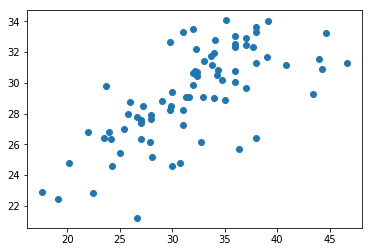

In [164]:
plot(auto_test.mpg, pred_mpg, 'o')


### Linear Regression

The simplest and most widely used algo for building regression models. The main strengths are linear scalability and a high level of interpretability.

This algo plots the dataset records as points, with the target variable on the y-axis and fits a straight line or plane in the case of two or more features to these points.

### Random Forest

This is a highly accurate nonlinear algo that is widely used in real-world classification and regression problems. 

The basis is a decision tree. It allows sorting the most important decisions and puts it to the top of the tree and then introduces less important varaibles gradually as 'questions' are answered.

#### Drabacks

Early decisions have major impact on the resulting answer. New data doesn't always follow exactly the same distro as the training set. So generalizing may be a problem.

#### Benefits

Immunity to unimportant features, noisy datasets in terms ofmissing data and mislabled records